<h1><p style="text-align: center;">Data Analysis with Python <br>Project</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, you'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a **box plot**.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees **Fahrenheit**, not Celsius!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
weather = pd.read_csv("weather.csv")

In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
STATION    8022 non-null object
DATE       8022 non-null object
AWND       4017 non-null float64
TAVG       1217 non-null float64
TMAX       8005 non-null float64
TMIN       7996 non-null float64
WT01       1777 non-null float64
WT02       221 non-null float64
WT03       227 non-null float64
WT04       119 non-null float64
WT05       360 non-null float64
WT06       25 non-null float64
WT07       79 non-null float64
WT08       404 non-null float64
WT09       69 non-null float64
WT10       2 non-null float64
WT11       3 non-null float64
WT13       1175 non-null float64
WT14       575 non-null float64
WT15       6 non-null float64
WT16       1326 non-null float64
WT17       12 non-null float64
WT18       345 non-null float64
WT19       4 non-null float64
WT21       18 non-null float64
WT22       32 non-null float64
dtypes: float64(24), object(2)
memory usage: 1.6+ MB


In [3]:
weather.sample(3)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
7853,USW00014765,2015-07-16,9.4,69.0,76.0,59.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913,USC00379423,2010-04-12,NaN,NaN,71.0,35.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,USC00379423,2005-11-07,NaN,NaN,61.0,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22'],
      dtype='object')

In [5]:
temperatures = weather[["TMIN", "TAVG", "TMAX"]]
temperatures.describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,7996.0,42.099425,17.386667,-10.0,29.0,42.0,57.0,77.0
TAVG,1217.0,52.493016,17.829792,6.0,39.0,54.0,68.0,86.0
TMAX,8005.0,61.247096,18.495043,13.0,46.0,62.0,77.0,102.0


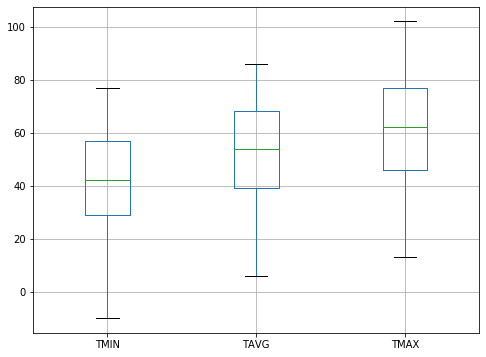

In [6]:
temperatures.boxplot(figsize = (8,6))
plt.show()

***

## Plotting the temperature difference

In this exercise, you'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting **histogram**? Does it match your expectations, or do you see anything unusual?

In [7]:
weather["TDIFF"] = weather.TMAX - weather.TMIN

In [8]:
weather[["TDIFF"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TDIFF,7994.0,19.149237,7.009716,-25.0,14.0,19.0,24.0,48.0


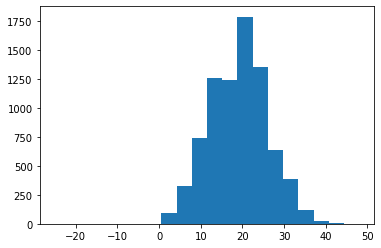

In [10]:
plt.hist(weather["TDIFF"], bins=20)
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

In [11]:
WT = weather.loc[:, "WT01":"WT22"]

In [12]:
weather["bad_conditions"] = WT.sum(axis=1)
weather["bad_conditions"].sample(5)

1186    0.0
563     0.0
4240    2.0
6947    3.0
7789    0.0
Name: bad_conditions, dtype: float64

In [13]:
weather["bad_conditions"].isnull().sum()

0

In [14]:
weather["bad_conditions"].fillna(0, inplace=True)

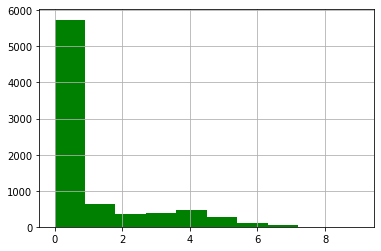

In [15]:
weather["bad_conditions"].hist(color="g")
plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

In [17]:
weather.bad_conditions.value_counts().sort_index(inplace=True)
weather.bad_conditions = weather.bad_conditions.astype(int)
weather.bad_conditions.value_counts()

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [18]:
mapping = {0: "good", 1: "bad", 2: "bad", 3: "bad", 4: "bad",
           5: "worse", 6: "worse", 7: "worse", 8: "worse", 9: "worse"}

In [19]:
weather["rating"] = weather.bad_conditions.map(mapping)
weather.rating.sample(10)

297     good
6406    good
5816     bad
5158     bad
4899     bad
6804    good
1390    good
3315    good
3298    good
2043    good
Name: rating, dtype: object

In [20]:
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

In [21]:
cats = ["good", "bad", "worse"]

In [22]:
weather["rating"].dtype

dtype('O')

In [23]:
weather["rating"] = pd.Categorical(weather["rating"], cats, ordered=True)

In [24]:
weather["rating"].head(2)

0    good
1    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [25]:
ri = pd.read_csv("police.csv", nrows=50000)
ri.head(5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [26]:
ri.drop(["county_name", "state"], axis = 1, inplace = True)

In [27]:
ri.dropna(subset = ["driver_gender"], inplace=True)

In [28]:
ri["is_arrested"] = ri["is_arrested"].astype(bool)

In [29]:
ri['combined'] = ri["stop_date"] + " " + ri["stop_time"]

In [30]:
ri["stop_datetime"] = pd.to_datetime(ri["combined"])

In [31]:
ri.set_index("stop_datetime", inplace = True)
ri.head(2)

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30


In [32]:
ri.reset_index(inplace=True)
ri.head(2)

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30


In [33]:
weather_rating = weather[["DATE", "rating"]]
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [34]:
ri.shape

(48010, 26)

In [35]:
weather_rating.shape

(8022, 2)

In [36]:
ri_weather = pd.merge(left=ri, right=weather_rating, how="left",
                      left_on ="stop_date", right_on="DATE")

In [37]:
ri_weather.head(2)

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,2005-01-02,bad


In [38]:
ri_weather.set_index("stop_datetime", inplace=True)

In [39]:
ri_weather.shape

(95877, 27)

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [40]:
ri_weather["is_arrested"].mean()

0.05181638974936638

In [41]:
ri_weather.groupby("rating")[["is_arrested"]].mean()

,is_arrested
rating,
good,0.051263
bad,0.051462
worse,0.062559


In [42]:
ri_weather.groupby(["violation","rating"])[["is_arrested"]].mean()

is_arrested
violation           rating             
Equipment           good       0.121123
                    bad        0.125000
                    worse      0.150943
Moving violation    good       0.114006
                    bad        0.116299
                    worse      0.133835
Other               good       0.275689
                    bad        0.283368
                    worse      0.270833
Registration/plates good       0.196108
                    bad        0.214286
                    worse      0.166667
Speeding            good       0.023061
                    bad        0.021220
                    worse      0.026168

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

In [43]:
arrest_rate = ri_weather.groupby(["violation","rating"])["is_arrested"].mean()
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

In [44]:
arrest_rate.xs(["Moving violation","bad"])

0.11629857422421024

In [45]:
arrest_rate.loc["Moving violation"].loc["bad"]

0.11629857422421024

In [46]:
arrest_rate.xs("Speeding")

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

In [47]:
arrest_rate.loc["Speeding"]

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

In [48]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [49]:
ri_weather.pivot_table("is_arrested", "violation", "rating")

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
